In [98]:
# -*- coding: utf-8 -*-
"""
Predicitve_Analytics.py
"""
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split
from scipy import stats

import time


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [122]:
def zscorenormalisation(X_train):
    sta_vec = np.std(X_train ,axis = 0)
    mean_vec = np.mean(X_train, axis = 0)
    
    for row in range(X_train.shape[0]):
        for col in range(X_train.shape[1]):
            X_train[row][col] = (X_train[row][col] - mean_vec[col])/sta_vec[col]
    
    return X_train

In [109]:
zscorenormalisation(X_train)

(48,)


In [127]:
def import_data(filename):
    df = pd.read_csv(filename)
    return df

df = import_data('data.csv')

input_data = df.values

X = input_data[:, :input_data.shape[1]-1]
y = input_data[:, input_data.shape[1]-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# scalar = MinMaxScaler()

# scalar.fit(X_train)
# X_train = scalar.transform(X_train)
# scalar.fit(X_test)
# X_test = scalar.transform(X_test)

X_train = zscorenormalisation(X_train)
X_test = zscorenormalisation(X_test)


In [4]:
k = 10

In [129]:
def find_center(cluster_centers, row, k):
    
    rows = np.tile(row, (k,1))
    
#     diff_vector = np.sum(np.absolute(cluster_centers - rows), axis = 1)
    diff_vector = np.sqrt(np.sum(np.square(cluster_centers - rows), axis = 1))
    
    return np.argmin(diff_vector)

In [128]:
def Accuracy(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    
    """
    diff = y_true - y_pred
    t = np.where(diff == 0)
    return t[0].shape[0]/y_true.shape[0]

In [130]:
def Recall(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    labels = [1,2,3,4,5,6,7,8,9,10,11]
    macro = []
    tp = [0 for x in labels]
    fn = [0 for x in labels]
    for i in range(len(labels)):
        actual = y_true
        pred = y_pred
        
        act_diff = actual - labels[i]
        pred_diff = pred - labels[i]
        
        for x in range(y_true.shape[0]):
            if y_true[x] == labels[i]:
                if y_pred[x] == y_true[x]:
                    tp[i] = tp[i] + 1
                else:
                    fn[i] = fn[i] + 1
        

    
    return np.sum(tp)/(np.sum(tp)+np.sum(fn))
        

In [145]:
print(Recall(y_test, z))

0.970458984375


In [132]:
def Precision(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    labels = [1,2,3,4,5,6,7,8,9,10,11]
    macro = []
    tp = [0 for x in labels]
    fp = [0 for x in labels]
    for i in range(len(labels)):
        actual = y_true
        pred = y_pred
        
        act_diff = actual - labels[i]
        pred_diff = pred - labels[i]
        
        for x in range(y_true.shape[0]):
            if y_pred[x] == labels[i]:
                if y_pred[x] == y_true[x]:
                    tp[i] = tp[i] + 1
                else:
                    fp[i] = fp[i] + 1
    
    return np.sum(tp)/(np.sum(tp)+np.sum(fp))
        
    

In [146]:
print(Precision(y_test, z))

0.970458984375


In [134]:
def WCSS(Clusters):
    """
    :Clusters List[numpy.ndarray]
    """
    wcss = 0
    # Get a cluster
    for cluster in Clusters:
        
        cluster_center = np.mean(cluster, axis = 0)
        
        # Compute all distances from cluster center.
        center_vector = np.tile(cluster_center, (cluster.shape[0], 1))
        
        
        wcss = wcss + np.sum(np.sqrt(np.sum(np.square(center_vector - cluster), axis = 1)))
#         wcss = wcss + np.sum(np.absolute(center_vector - cluster))
    
    return wcss

    

In [135]:
def ConfusionMatrix(y_true,y_pred):
    
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """  
    cf_matrix = np.zeros((11,11))
    
    for x in range(y_true):
        cf_matrix[y_true][y_pred] = cf_matrix[y_true][y_pred] + 1
    
    return cf_matrix

In [136]:
def KNN(X_train,X_test,Y_train):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: numpy.ndarray
    """
    k=10
    labels = np.zeros(X_test.shape[0])
    for x in range(X_test.shape[0]):
        row = np.tile(X_test[x], (X_train.shape[0],1))
        diff_matrix = np.sum(np.absolute(X_train - row), axis=1)
        labelled_matrix = np.vstack((diff_matrix, Y_train))
        labelled_matrix = labelled_matrix.T
        sorted_matrix = labelled_matrix[labelled_matrix[:,0].argsort()]
        top_k = sorted_matrix[:k]
        labels[x] = stats.mode(top_k[:,1])[0]
    return labels

In [137]:
def RandomForest(X_train,Y_train,X_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: numpy.ndarray
    """

In [138]:
def PCA(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: numpy.ndarray
    """
    Covariance = np.dot(X_train.T, X_train) / (N-1)
    __ , vector = np.linalg.eig(Covariance)
    return np.dot(X_train, vector)

In [139]:
def Kmeans(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: List[numpy.ndarray]
    """
    
    cluster_centers = X_train[np.random.choice(X_train.shape[0], size = N), ]
    clusters = [np.zeros((1,X_train.shape[1])) for x in range(N)]
    
    epochs = 10
    
    for epoch in range(epochs):
        print(epoch)
        clusters = [np.zeros((1,X_train.shape[1])) for x in range(N)]
        
        print('starting main loop')
        for x in range(X_train.shape[0]):
            center_index = find_center(cluster_centers, X_train[x], N)

            # Adding the new point to the cluster.        
            clusters[center_index] = np.vstack((clusters[center_index], X_train[x]))
        
        print('recomputing center.')
        
        # Recomputing the center.
        for x in range(cluster_centers.shape[0]): 
            cluster_centers[x] = np.mean(clusters[x], axis = 0)
        
        print('done computing centers.')

    
    return clusters

In [140]:
def SklearnSupervisedLearning(X_train,Y_train,X_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """

In [141]:
def SklearnVotingClassifier(X_train,Y_train,X_test):
    
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """

In [142]:
"""
Create your own custom functions for Matplotlib visualization of hyperparameter search. 
Make sure that plots are labeled and proper legends are used
""" 

'\nCreate your own custom functions for Matplotlib visualization of hyperparameter search. \nMake sure that plots are labeled and proper legends are used\n'

In [143]:
start_time = time.time()
K_clusters = Kmeans(X_train, k)
print("--- %s seconds ---" % (time.time() - start_time))

print(WCSS(K_clusters))

print("--- %s seconds ---" % (time.time() - start_time))

0
starting main loop
recomputing center.
done computing centers.
1
starting main loop
recomputing center.
done computing centers.
2
starting main loop
recomputing center.
done computing centers.
3
starting main loop
recomputing center.
done computing centers.
4
starting main loop
recomputing center.
done computing centers.
5
starting main loop
recomputing center.
done computing centers.
6
starting main loop
recomputing center.
done computing centers.
7
starting main loop
recomputing center.
done computing centers.
8
starting main loop
recomputing center.
done computing centers.
9
starting main loop
recomputing center.
done computing centers.
--- 104.35855793952942 seconds ---
147228.8081345505
--- 104.38286709785461 seconds ---


In [144]:
start_time = time.time()
z= KNN(X_train, X_test, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 279.2339541912079 seconds ---


In [147]:
z
Accuracy(y_test, z)


0.970458984375

In [ ]:
start_time = time.time()
print(PCA(X_train, X_train.shape))
print("--- %s seconds ---" % (time.time() - start_time))

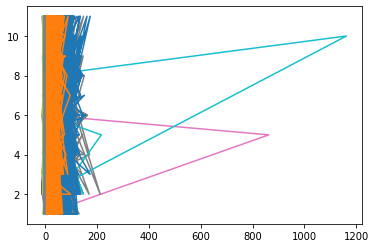

In [21]:
%matplotlib inline
    
    
# Plotting K means
def Plot_clusters(clusters):
    fig = plt.figure()
#     ax = fig.add_subplot(111)

    
    
    plt.plot(X_train,y_train)
 
    plt.show()

Plot_clusters([1,2])

In [25]:
# plt.imshow(Confu, cmap='binary')


print(WCSS(K_clusters))

262066.43499793817


In [97]:
print(y_test)
print(z)

[ 7.  3. 11. ...  1.  5.  7.]
[ 3.  2. 11. ...  4.  3.  1.]


In [105]:
X_test.shape[0]
q = np.tile(X_train[0], (X_test.shape[0],1))
q.shape




(8192, 48)

array([7., 6., 3., ..., 7., 5., 6.])